### IMPORTING LIBRARIES

In [1]:
# Importing libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing
import seaborn as sns
import matplotlib.pyplot as plt

### DATAFRAME CREATION

In [2]:
# # Reading the data files
# with open('dataset/adult.data','r') as adult_data:
#     row_data = adult_data.readlines()

# # Creating an array to store the data by rows in order to change it to differnt columns
# data_rows = []
# #Arranging the data columns doing necessary splittings
# for data_row in row_data:
#     data_rows.append(data_row)

# # Splitting the dataset to necessary columns
# adult_data_array = []
# for data_row in data_rows:
#     adult_data_array.append(data_row.split(','))

### DATASET ANALYSIS

In [3]:
# Reading the dataset
adult_data = pd.read_csv('dataset/adult.data', header=None)
# displaying the head of the dataset
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']
adult_data.columns = column_names
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Number of instances and attributes
adult_data.shape

(32561, 15)

In [6]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Sum of the missing cells of each attribute
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [8]:
# Categorical variables
cat_cols = []
for col in adult_data.columns:
    if adult_data[col].dtype == 'O':
        cat_cols.append(col)

In [9]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [10]:
# education-num column should also be categorical so we will add it
cat_cols.append('education-num')

In [11]:
adult_data[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,education-num
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,13
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,9
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,7
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,13
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,12
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,9
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,9
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,9


In [12]:
# We have an imbalanced dataset
for col in cat_cols:
    print(adult_data[col].value_counts())
    print()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

occupation
 Prof-specialty       4140
 Craft-repa

In [13]:
# Numerical columns
num_cols = set(adult_data.columns).difference(cat_cols)

In [14]:
num_cols = list(num_cols)
num_cols

['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']

<Figure size 1000x3000 with 0 Axes>

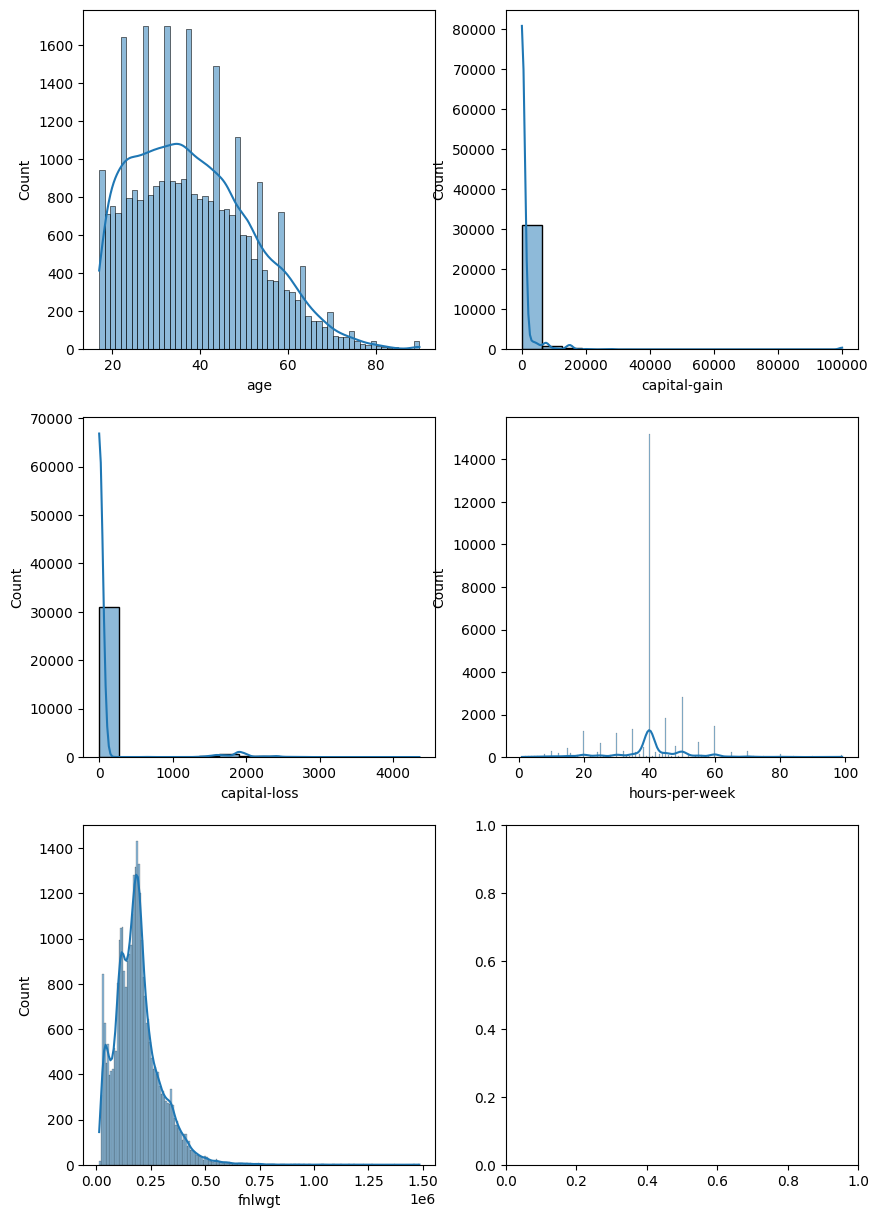

In [15]:
plt.figure(figsize = (10, 30))

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(adult_data[col], kde = True, ax = axes[i])
    
plt.show()

### DATA CLEANING

In [16]:
# Counting the number of unique values
adult_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [17]:
# Printing unique values for each column
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


workclass unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt unique values:
[ 77516  83311 215646 ...  34066  84661 257302]


education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handlers-clean

In [18]:
# Checking the count of '?' in each columns.
adult_data.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [19]:
# Only workclass, occupation and native.country has unknown values
# Imputing with mode values
for col in ['workclass', 'occupation', 'native-country']:
    adult_data[col].replace(' ?', pd.NA, inplace=True)

In [20]:
# Dropping the rows with NaN in the above columns
adult_data = adult_data.dropna(subset=['workclass', 'occupation', 'native-country'])

In [21]:
# Printing the unique values after droppping
for col in ['workclass', 'occupation', 'native-country']:
    print(f"{col} unique values after removing '?':")
    print(adult_data[col].unique())

workclass unique values after removing '?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
occupation unique values after removing '?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
native-country unique values after removing '?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'

In [22]:
# After dropping, checking the count of NaN in all columns.
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [23]:
adult_data.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [24]:
# Calculate the mean excluding the zero values in 'capital-gain'
mean_value = adult_data[adult_data["capital-gain"] != 0]['capital-gain'].mean()

# Replace the zero values with the mean
adult_data['capital-gain'] = adult_data['capital-gain'].replace(0, mean_value)

# Printing the results
print(adult_data['capital-gain'])
print(adult_data['capital-gain'].unique())

0         2174.000000
1        12977.596927
2        12977.596927
3        12977.596927
4        12977.596927
             ...     
32556    12977.596927
32557    12977.596927
32558    12977.596927
32559    12977.596927
32560    15024.000000
Name: capital-gain, Length: 30162, dtype: float64
[ 2174.         12977.59692671 14084.          5178.
  5013.          2407.         14344.         15024.
  7688.          4064.          4386.          7298.
  1409.          3674.          1055.          2050.
  2176.           594.         20051.          6849.
  4101.          8614.          3411.          2597.
 25236.          4650.          2463.          3103.
 10605.          2964.          3325.          2580.
  3471.          4865.         99999.          6514.
  1471.          2329.          2105.          2885.
 10520.          2202.          2961.         27828.
  6767.          2228.          1506.         13550.
  2635.          5556.          4787.          3781.
  3137.          38

In [25]:
# Calculate the mean excluding the zero values in 'capital-loss'
mean_value = adult_data[adult_data["capital-loss"] != 0]['capital-loss'].mean()

# Replace the zero values with the mean
adult_data['capital-loss'] = adult_data['capital-loss'].replace(0, mean_value)

# Printing the results
print(adult_data['capital-loss'])
print(adult_data['capital-loss'].unique())

0        1867.898388
1        1867.898388
2        1867.898388
3        1867.898388
4        1867.898388
            ...     
32556    1867.898388
32557    1867.898388
32558    1867.898388
32559    1867.898388
32560    1867.898388
Name: capital-loss, Length: 30162, dtype: float64
[1867.89838823 2042.         1408.         1902.         1887.
 1719.         1762.         1564.         2179.         1816.
 1980.         1977.         1876.         1340.         2206.
 1741.         1485.         2339.         2415.         1380.
 1721.         2051.         2377.         1669.         2352.
 1672.          653.         2392.         1504.         1590.
 1651.         1628.         1848.         2001.         1740.
 2002.         1579.         2258.         1602.         2547.
 2205.         1726.         2444.         1138.         2238.
  625.          213.         1539.          880.         1668.
 1092.         1594.         2231.         1844.          810.
 2824.         2559.      

In [26]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,12977.596927,1867.898388,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,12977.596927,1867.898388,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.000000,1867.898388,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.000000,1867.898388,40,United-States,>50K


In [27]:
# Removing duplicate rows
adult_data.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,12977.596927,1867.898388,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12977.596927,1867.898388,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,12977.596927,1867.898388,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,12977.596927,1867.898388,20,United-States,<=50K


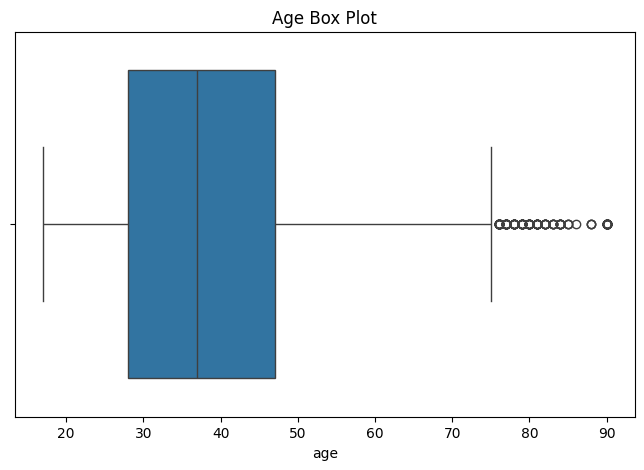

In [28]:
# Creating a box plot for the "Age" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["age"])
plt.title("Age Box Plot")
plt.show()

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_22360\2630097155.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38.153609933575886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adult_data.loc[adult_data["age"] > 75, "age"] = mean_age


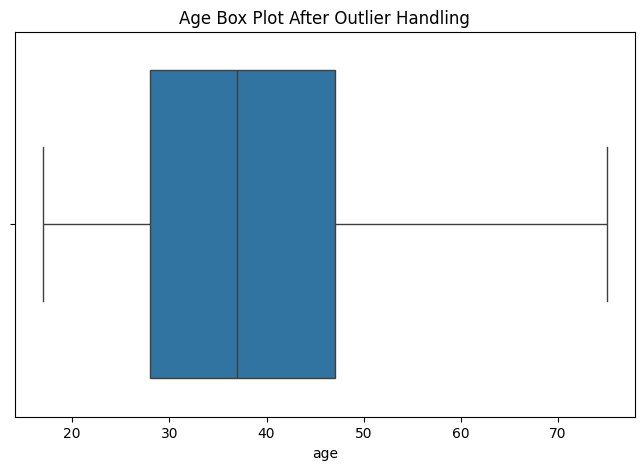

In [29]:
# Handle outliers by replacing values above 75 with the mean of values below 75
mean_age = adult_data.loc[adult_data["age"] < 75, "age"].mean()
adult_data.loc[adult_data["age"] > 75, "age"] = mean_age

# Create a box plot for the "Age" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["age"])
plt.title("Age Box Plot After Outlier Handling")
plt.show()

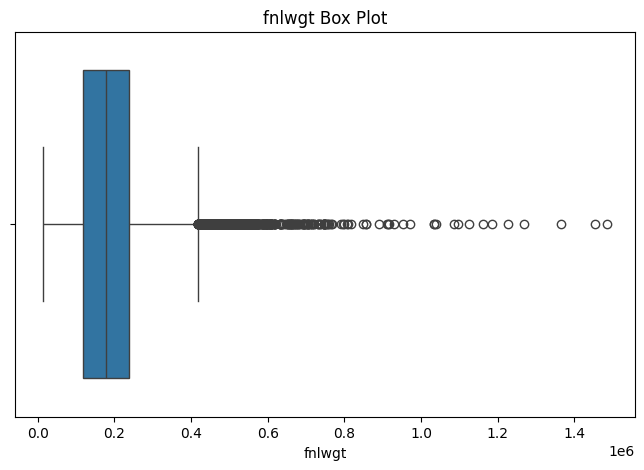

In [30]:
# Create a box plot for the "Final-Weight" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["fnlwgt"])
plt.title("fnlwgt Box Plot")
plt.show()

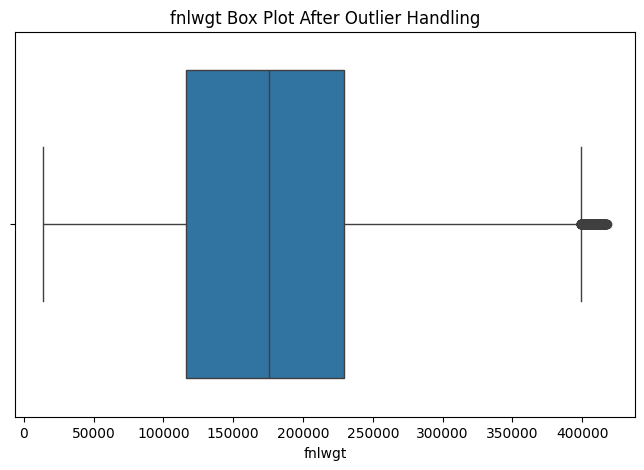

In [31]:
# Handling the outliers in Final-Weight
Q1 = adult_data['fnlwgt'].quantile(0.25)
Q3 = adult_data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
adult_data = adult_data[(adult_data['fnlwgt'] >= lower_bound) & (adult_data['fnlwgt'] <= upper_bound)]

# Create a box plot for the "fnlwgt" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["fnlwgt"])
plt.title("fnlwgt Box Plot After Outlier Handling")
plt.show()

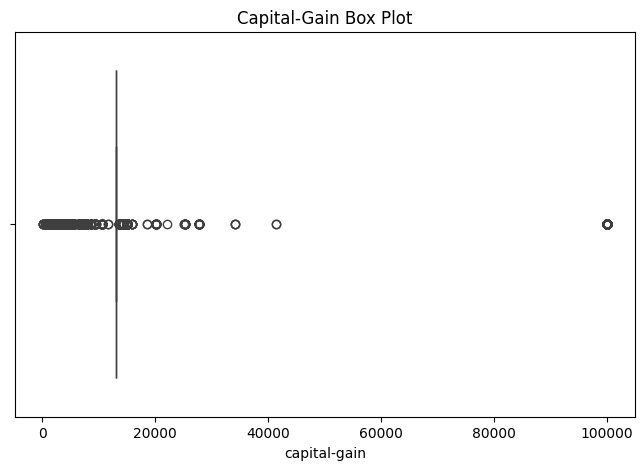

In [32]:
# Create a box plot for the "capital-gain" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["capital-gain"])
plt.title("Capital-Gain Box Plot")
plt.show()

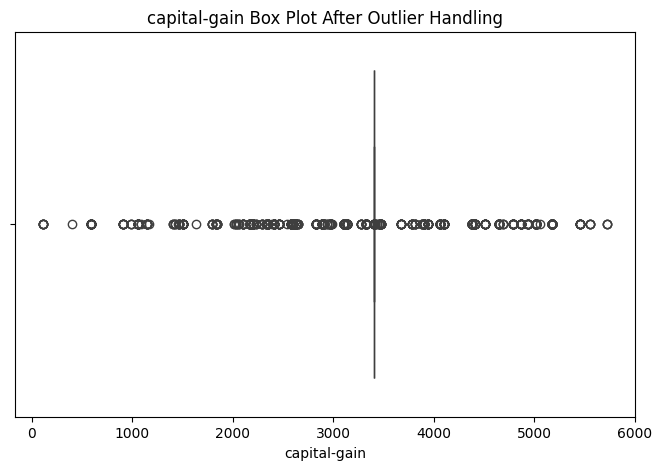

In [33]:
# Handle outliers by replacing values above 6000 with the mean of values below that threshold
outlier_threshold = 6000

mean_below_threshold = adult_data.loc[adult_data["capital-gain"] <= outlier_threshold, "capital-gain"].mean()
adult_data.loc[adult_data["capital-gain"] > outlier_threshold, "capital-gain"] = mean_below_threshold

# Create a box plot for the "capital-gain" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["capital-gain"])
plt.title("capital-gain Box Plot After Outlier Handling")
plt.show()

In [34]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00000,1867.898388,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3403.72118,1867.898388,13,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,3403.72118,1867.898388,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3403.72118,1867.898388,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,3403.72118,1867.898388,40,Cuba,<=50K


In [35]:
# Creating new column of income_num in dataframe. It is valued according to income.(Income : >50k = 1, <=50k = 0)
adult_data['income_num'] = adult_data['income'].map({' <=50K':0, ' >50K':1})
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00000,1867.898388,40,United-States,<=50K,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3403.72118,1867.898388,13,United-States,<=50K,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,3403.72118,1867.898388,40,United-States,<=50K,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3403.72118,1867.898388,40,United-States,<=50K,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,3403.72118,1867.898388,40,Cuba,<=50K,0


In [36]:
# Finding the count of rows which has below_50k income and above_50k income.

below_50k=(adult_data.income_num == 0).sum()
print("Income with below 50k count :",below_50k)
above_50k=(adult_data.income_num == 1).sum()
print("Income with above 50k count :",above_50k)

Income with below 50k count : 21953
Income with above 50k count : 7306


### DATA VISUALIZATION

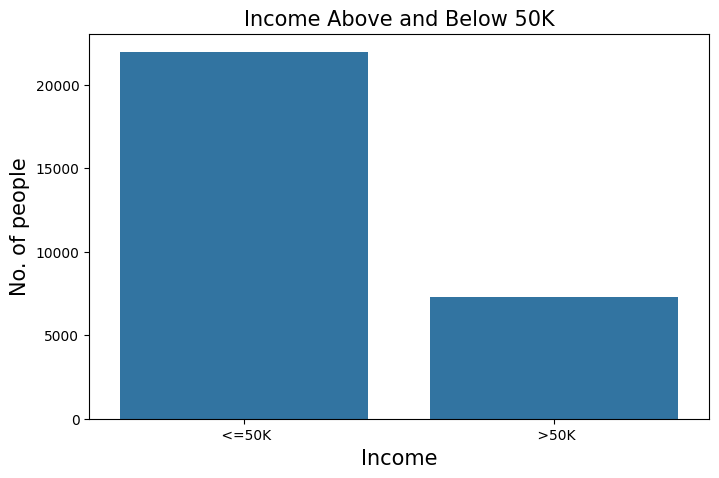

In [37]:
# Plotting bar chart income vs no. of people
fig,axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data = adult_data, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

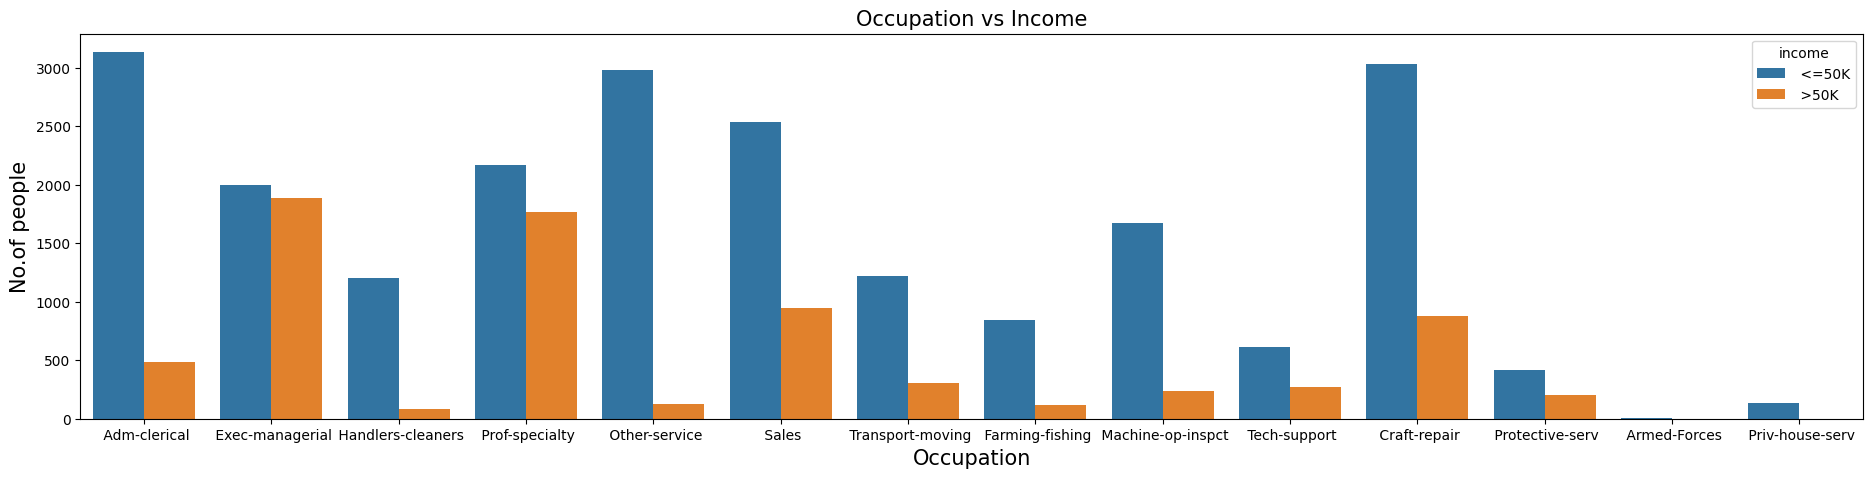

In [38]:
# Plotting the bar chart of occupation vs income count.
fig, axes = plt.subplots(1,1,figsize=(23,5))
sns.countplot(data=adult_data,x='occupation',hue='income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

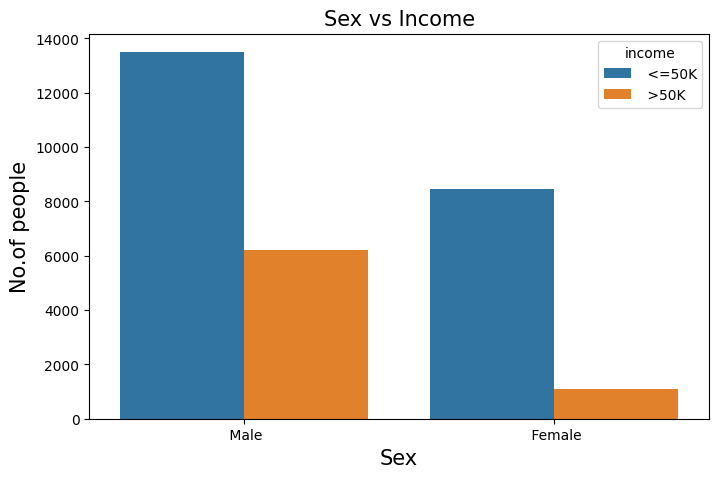

In [39]:
# Plotting the bar charts of sex vs income count.
fig, axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data=adult_data,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

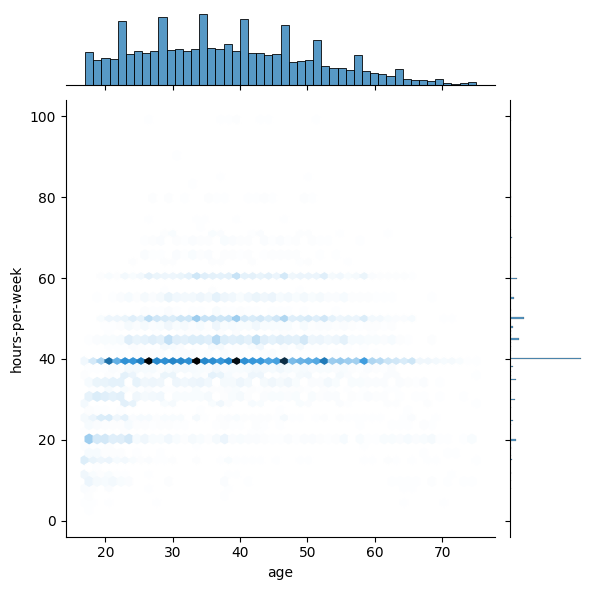

In [40]:
sns.jointplot(x ="age", y="hours-per-week", data=adult_data, kind="hex")

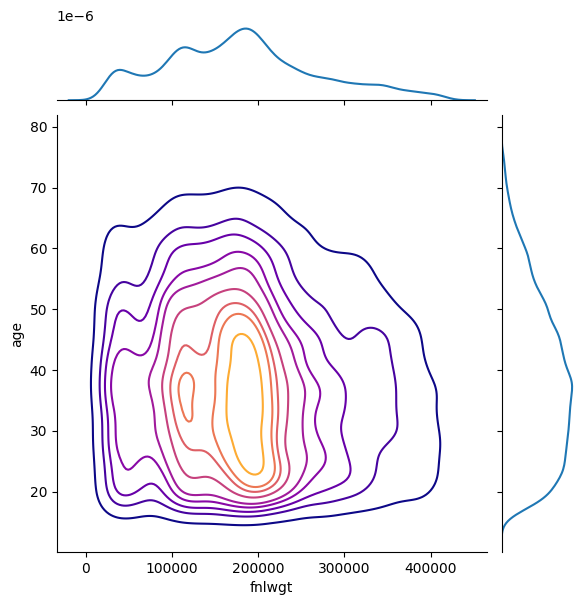

In [41]:
sns.jointplot(x="fnlwgt", y="age", data=adult_data, kind="kde", cmap="plasma", thresh=0.05)

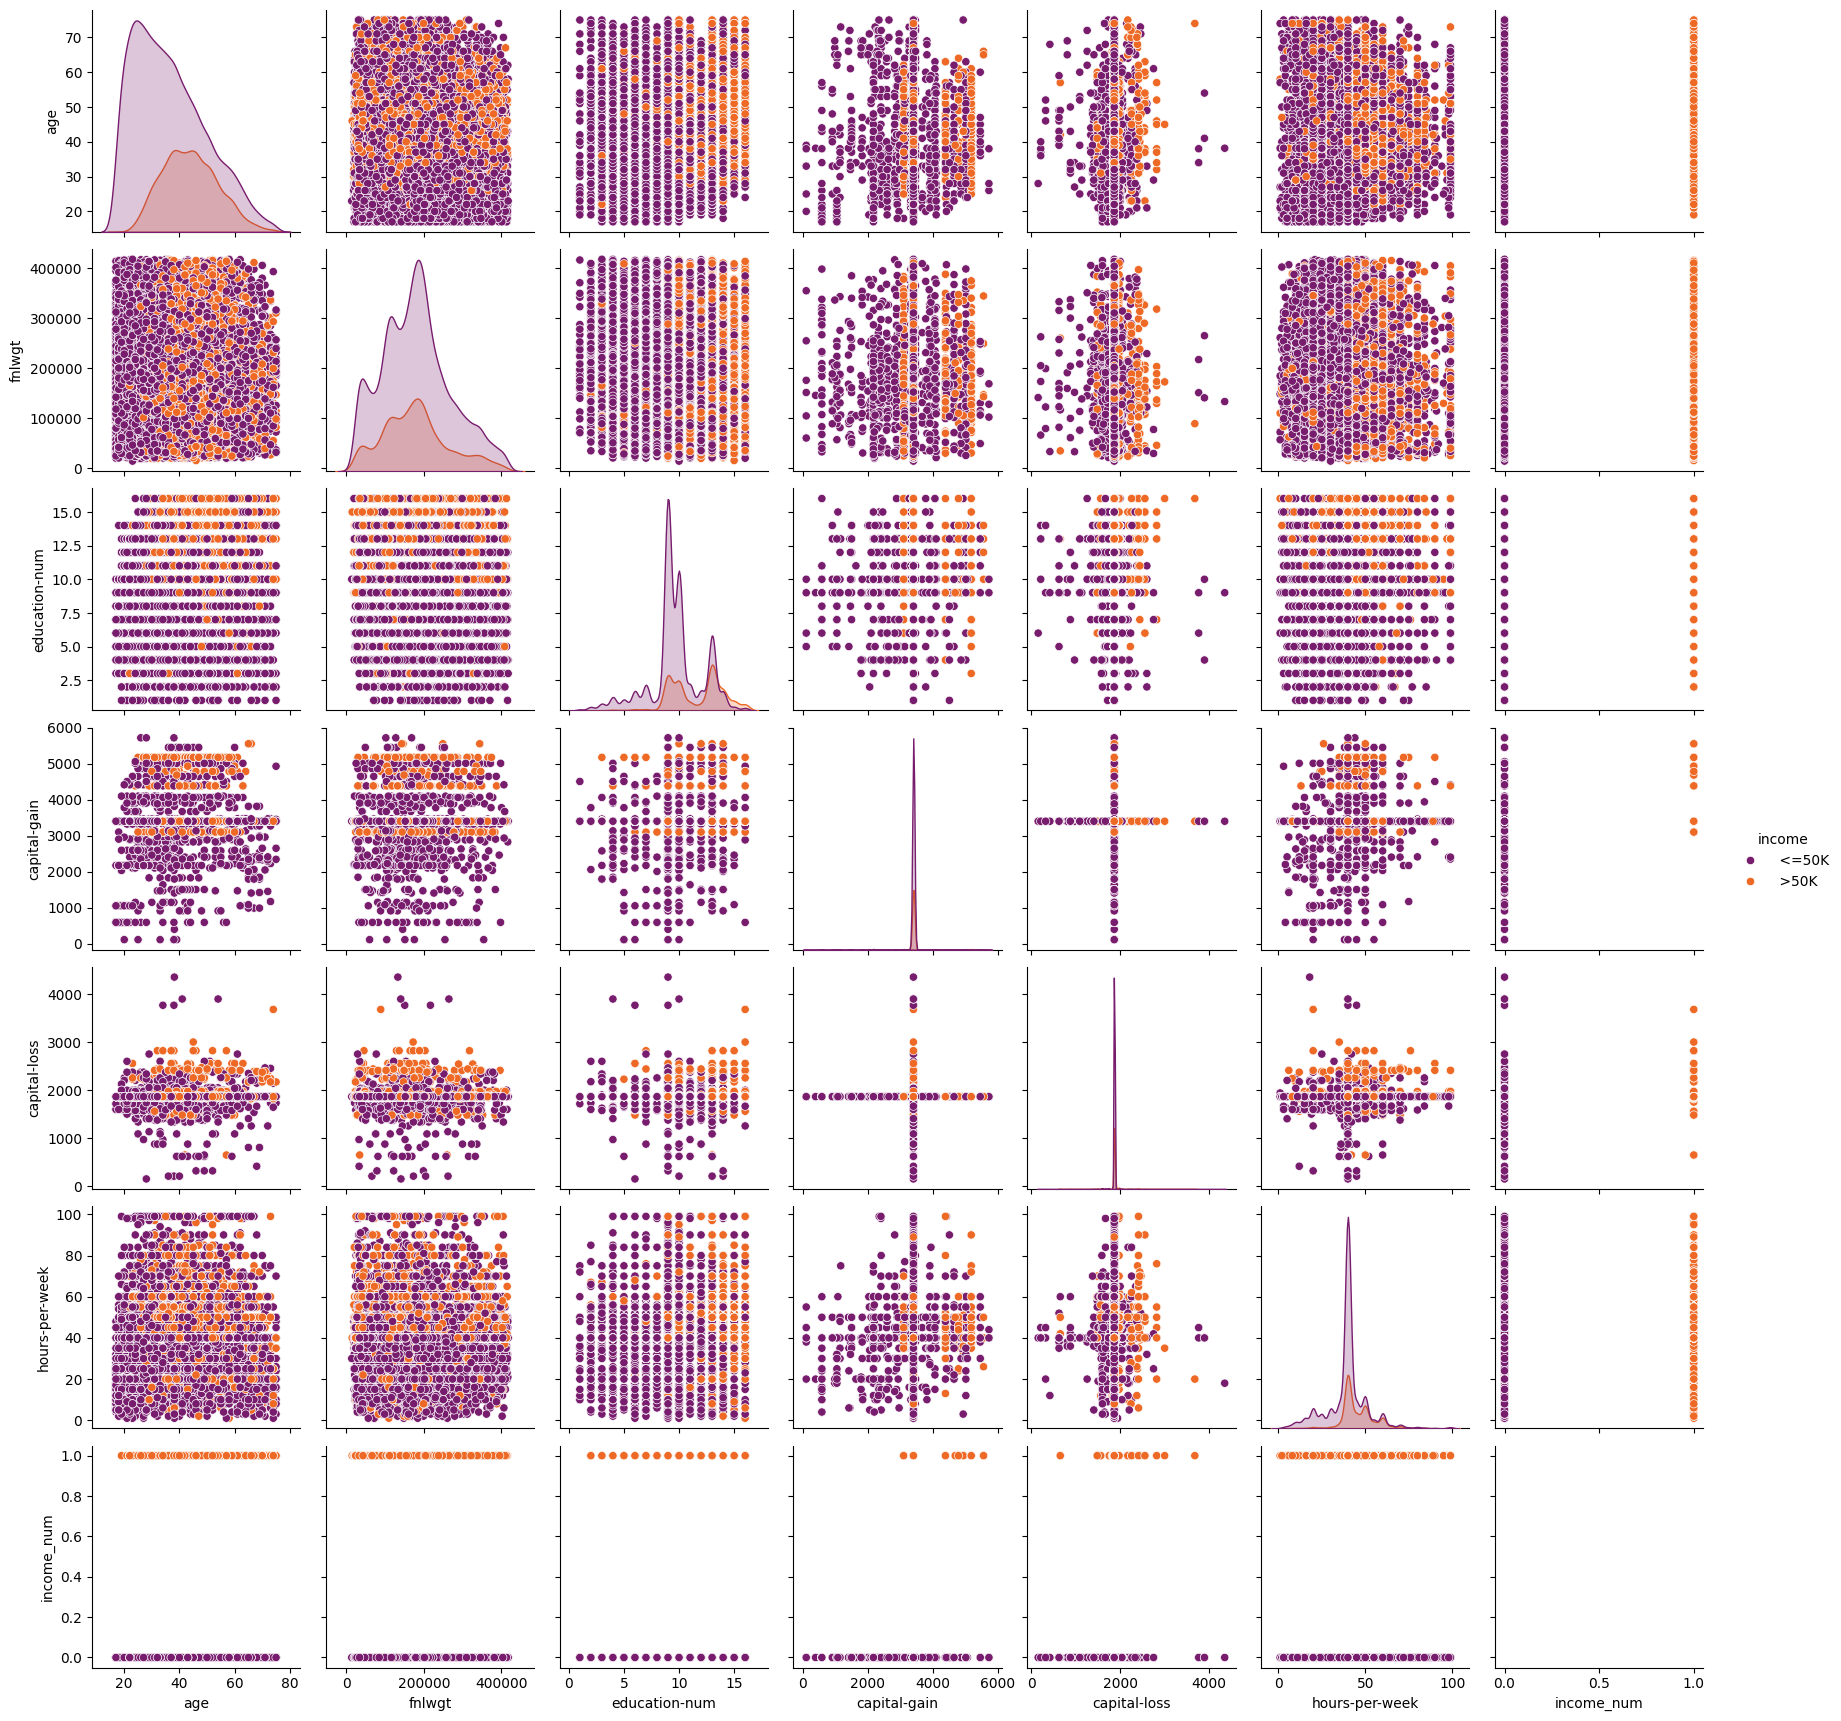

In [42]:
sns.pairplot(adult_data, hue = 'income', palette = 'inferno')

In [45]:
# Saving the DataFrame to a CSV File
adult_data.to_csv('preprocessed_dataset/preprocessed_adult_data.csv', index=False)